In [1]:
import os
import sys
sys.path.insert(0, '../')
import ccal
%matplotlib inline
# %config InlineBackend.figure_formats = {'svg',}

import numpy as np
import pandas as pd

==================== Computational Cancer Analysis Library ====================
<09:52:33> Checking library dependencies ...
<09:52:33> Using the following libraries:
<09:52:33> 	scipy (v0.18.0)
<09:52:33> 	statsmodels (v0.6.1)
<09:52:33> 	scikit-learn (v0.17.1)
<09:52:33> 	seaborn (v0.7.1)
<09:52:33> 	rpy2 (v2.8.2)
<09:52:33> 	pandas (v0.18.1)
<09:52:33> 	matplotlib (v1.5.1)
<09:52:33> 	numpy (v1.11.1)
<09:52:33> Planted a random seed 20121020.


# Get states

In [2]:
h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
n_states_to_explore = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30]
nclustering = 1000
states_filename = 'ccle_hema_k_9_H_1000clustering.txt'

In [3]:
# labels, cophenetic_correlation = ccal.analyze.get_states_from_h(h, n_states_to_explore, nclustering=nclustering, filename=states_filename)

# Map Onco GPS

<09:52:33> Creating Onco-GPS with 166 samples, 9 components, and 8 states [1, 2, 3, 4, 5, 6, 7, 8] ...
components_coordinates: 9 [[  3.37857315 -13.0783645 ]
 [ -2.48106777  -2.89377499]
 [ -6.70951463  11.54990921]
 [ -2.02060335   4.03434478]
 [ 11.5429763    3.4937245 ]
 [ -6.6434659   -9.63141864]
 [  5.26992019  12.32491323]
 [-13.44475059  -0.10509572]
 [ 11.10793259  -5.69423786]]
components_coordinates (after Delaunay): 9 [[  3.37857315 -13.0783645 ]
 [ -2.48106777  -2.89377499]
 [ -6.70951463  11.54990921]
 [ -2.02060335   4.03434478]
 [ 11.5429763    3.4937245 ]
 [ -6.6434659   -9.63141864]
 [  5.26992019  12.32491323]
 [-13.44475059  -0.10509572]
 [ 11.10793259  -5.69423786]]
components_coordinates (after convexhull): 9 [[  3.37857315 -13.0783645 ]
 [ -2.48106777  -2.89377499]
 [ -6.70951463  11.54990921]
 [ -2.02060335   4.03434478]
 [ 11.5429763    3.4937245 ]
 [ -6.6434659   -9.63141864]
 [  5.26992019  12.32491323]
 [-13.44475059  -0.10509572]
 [ 11.10793259  -5.69423786

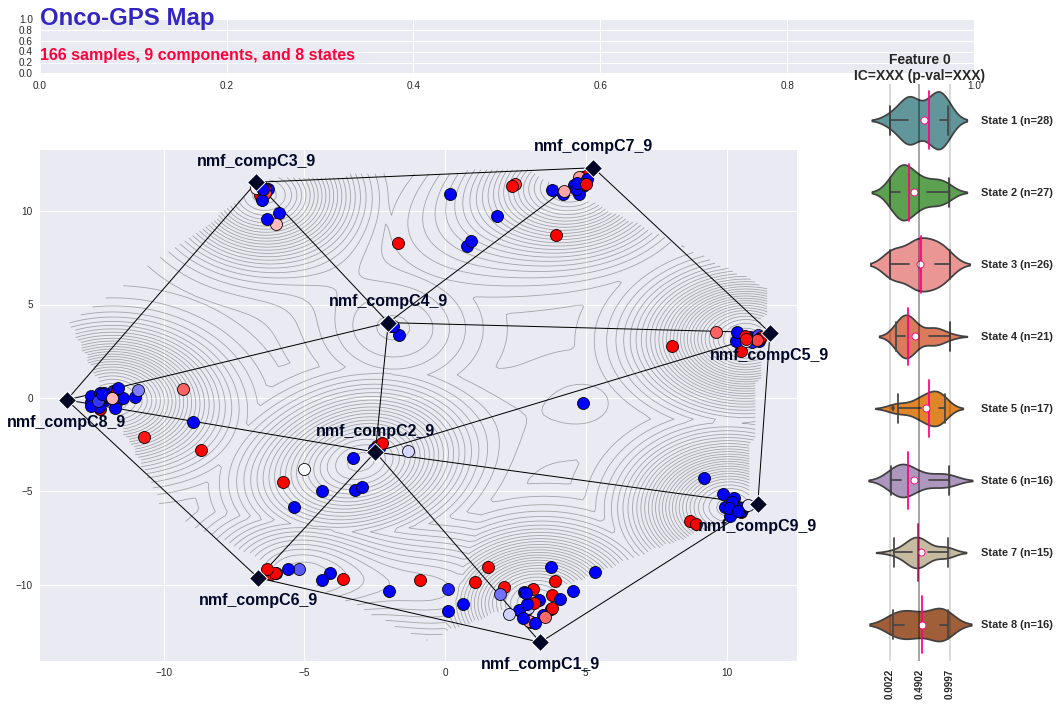

In [4]:
labels = pd.read_csv(states_filename, index_col=0, sep='\t')
annotations = ccal.support.make_random_features(1, labels.shape[1] - 1)
for n_state in [n_states_to_explore[5]]:
    states = labels.ix[n_state, :-1].astype(int).tolist()
    ccal.visualize.plot_onco_gps(h, states, annotations=annotations, background=False, output_filename='ccle_hema_k_9_H_1000clustering_s{}_random_annotation.pdf'.format(n_state))
#     ccal.visualize.plot_onco_gps(h, states, output_filename='ccle_hema_k_9_H_1000clustering_s{}.pdf'.format(n_state))